# Inbasekaran Perumal 
# EC802
# Low power VLSI 

## Assignment 2
### Jan-27-2023

### Spice netlist 
```spice
*** inverter i_sc

.include ./t14y_tsmc_025_level3.txt

*** netlist
mu vdd vin vout vdd cmosp l = 1u w = 25u
md vout vin 0 0 cmosn l = 1u w = 10u

vdd vdd 0 5
vin vin 0 PULSE(0 5 0 0 0 1n 2n)

*** paracitic
C_l vout 0 200fF

.control
    tran .0001n 2n
    plot vin vout title "Input a"
    plot i(vdd) title "Short circuit current"
    wrdata output/2/data.txt v(vout) v(vin) i(vdd)
.endc

.end


```

### t14y_tsmc_025_level3.txt
```spice
 *                                                                               
* DATE: Jun 11/01                                                               
* LOT: T14Y                  WAF: 03                                            
* DIE: N_Area_Fring          DEV: N3740/10                                      
* Temp= 27                                                                      
.MODEL CMOSN NMOS (                                 LEVEL  = 3                  
+ TOX    = 5.7E-9          NSUB   = 1E17            GAMMA  = 0.4317311          
+ PHI    = 0.7             VTO    = 0.4238252       DELTA  = 0                  
+ UO     = 425.6466519     ETA    = 0               THETA  = 0.1754054          
+ KP     = 2.501048E-4     VMAX   = 8.287851E4      KAPPA  = 0.1686779          
+ RSH    = 4.062439E-3     NFS    = 1E12            TPG    = 1                  
+ XJ     = 3E-7            LD     = 3.162278E-11    WD     = 1.232881E-8        
+ CGDO   = 6.2E-10         CGSO   = 6.2E-10         CGBO   = 1E-10              
+ CJ     = 1.81211E-3      PB     = 0.5             MJ     = 0.3282553          
+ CJSW   = 5.341337E-10    MJSW   = 0.5             )                           

.MODEL CMOSP PMOS (                                 LEVEL  = 3                  
+ TOX    = 5.7E-9          NSUB   = 1E17            GAMMA  = 0.6348369          
+ PHI    = 0.7             VTO    = -0.5536085      DELTA  = 0                  
+ UO     = 250             ETA    = 0               THETA  = 0.1573195          
+ KP     = 5.194153E-5     VMAX   = 2.295325E5      KAPPA  = 0.7448494          
+ RSH    = 30.0776952      NFS    = 1E12            TPG    = -1                 
+ XJ     = 2E-7            LD     = 9.968346E-13    WD     = 5.475113E-9        
+ CGDO   = 6.66E-10        CGSO   = 6.66E-10        CGBO   = 1E-10              
+ CJ     = 1.893569E-3     PB     = 0.9906013       MJ     = 0.4664287          
+ CJSW   = 3.625544E-10    MJSW   = 0.5             )                           
*                               
```

### Circuit diagram of inverter with short circuit current
<img src="./01_vsc/inv.png" width="400" />

### Exporting the data as a csv file and plotting the wave forms in matplotlib

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data1 = np.genfromtxt('/home/pinbo/LP_VLSI/Docker/ngspice/LP-VLSI/Assignment-2/01_vsc/output/1/data.txt')
data2 = np.genfromtxt('/home/pinbo/LP_VLSI/Docker/ngspice/LP-VLSI/Assignment-2/01_vsc/output/2/data.txt')
data3 = np.genfromtxt('/home/pinbo/LP_VLSI/Docker/ngspice/LP-VLSI/Assignment-2/01_vsc/output/3/data.txt')

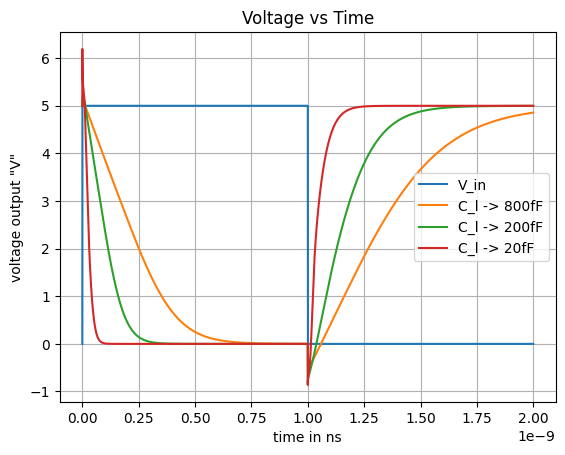

In [3]:
# plot the input wave form
plt.plot(data1[:,2], data1[:,3], label=f'V_in')
# plot the first data set
plt.plot(data1[:,0], data1[:,1], label=f'C_l -> 800fF')
# plot the second data set
plt.plot(data2[:,0], data2[:,1], label=f'C_l -> 200fF')
# plot the third data set
plt.plot(data3[:,0], data3[:,1], label=f'C_l -> 20fF')

# add a legend
plt.legend()
plt.xlabel('time in ns')
plt.ylabel('voltage output "V"')
plt.title('Voltage vs Time')
plt.grid()
plt.show()

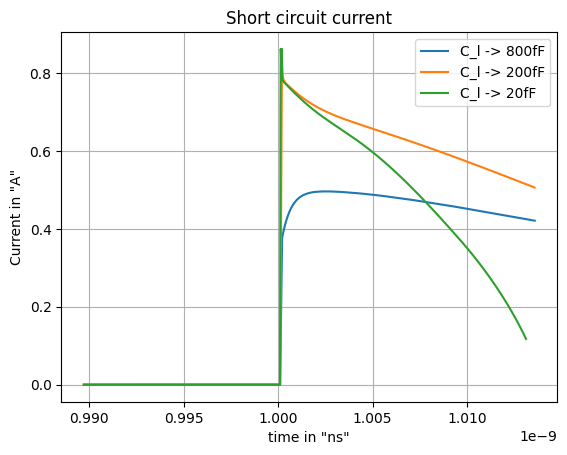

In [4]:
n = len(data1)//2
plt.plot(data1[n-100:n+150,0], -data1[n-100:n+150:,1], label=f'C_l -> 800fF')
# plot the second data set
plt.plot(data2[n-100:n+150,0], -data2[n-100:n+150:,1], label=f'C_l -> 200fF')
# plot the third data set
plt.plot(data3[n-100:n+150,0], -data3[n-100:n+150:,1], label=f'C_l -> 20fF')

# add a legend
plt.legend()
plt.xlabel('time in "ns"')
plt.ylabel('Current in "A"')
plt.title('Short circuit current')
plt.grid()
plt.show()

In [7]:
data = np.array([data1[n-100:n+150,0], 
                -data1[n-100:n+150,1],
                -data2[n-100:n+150,1],
                -data3[n-100:n+150,1]])

# convert the array to a pandas dataframe
df = pd.DataFrame(data.T, columns=['Time', '800fF', '200fF','20fF'])

# display the table in the notebook
print(df)

             Time     800fF         200fF          20fF
0    9.897043e-10 -0.000994 -2.375076e-09 -1.062053e-09
1    9.898043e-10 -0.000993 -2.371783e-09 -1.062108e-09
2    9.899043e-10 -0.000992 -2.368499e-09 -1.062053e-09
3    9.900043e-10 -0.000990 -2.365222e-09 -1.062107e-09
4    9.901043e-10 -0.000989 -2.361954e-09 -1.062053e-09
..            ...       ...           ...           ...
245  1.013190e-09  0.424369  5.137054e-01  1.558720e-01
246  1.013290e-09  0.423465  5.117607e-01  1.465990e-01
247  1.013390e-09  0.422610  5.099116e-01  1.370744e-01
248  1.013490e-09  0.421704  5.079643e-01  1.272771e-01
249  1.013590e-09  0.420847  5.061116e-01  1.171814e-01

[250 rows x 4 columns]


```
The short circuit current in a CMOS inverter is a function of the load capacitance because it is directly proportional to the rate of change of the voltage across the load capacitance. When the load capacitance is small, the rate of change of voltage is high, which results in a high short circuit current. As the load capacitance increases, the rate of change of voltage decreases, resulting in a lower short circuit current.

Additionally, the load capacitance also affects the rise and fall times of the inverter output voltage. In the above example the width of pmos is 2.5 times the width of nmos to have equal raise and fall times. A larger load capacitance will result in slower rise and fall times and vice versa.

In conclusion , a larger load capacitance will result in a lower short circuit current and slower rise and fall times while a smaller load capacitance will result in a higher short circuit current and faster rise and fall times.
```

### END